# Fokker–Planck equation

### Fokker-Planck equation is a partial differential equation that describes the evolution of a probability density function for a stochastic process. While it can be applied to many different types of systems, in finance it is often used to model the diffusion of stock prices.  

https://en.wikipedia.org/wiki/Fokker%E2%80%93Planck_equation  

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# Define the stock symbol and time period
symbol = "AAPL"
start_date = "2023-01-01"
end_date = "2023-02-01"


In [3]:
# Retrieve the historical data for the stock
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.879326,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,126.167366,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.829399,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,129.422394,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.951584,70790800


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-25,140.889999,142.429993,138.809998,141.860001,141.643738,65799300
2023-01-26,143.169998,144.250000,141.899994,143.960007,143.740540,54105100
2023-01-27,143.160004,147.229996,143.080002,145.929993,145.707520,70555800
2023-01-30,144.960007,145.550003,142.850006,143.000000,142.781998,64015300
2023-01-31,142.699997,144.339996,142.279999,144.289993,144.070023,65874500


In [6]:
# Calculate the daily returns and log returns
returns = df['Adj Close'].pct_change().dropna()
log_returns = np.log(1 + returns)

In [7]:
# Calculate the mean and variance of the daily returns
mean_return = np.mean(returns)
variance_return = np.var(returns)

In [8]:
# Define the drift and diffusion coefficients
drift = mean_return - 0.5 * variance_return
diffusion = np.sqrt(variance_return)

In [9]:
# Define the Fokker-Planck equation
def fokker_planck(x, t):
    return -drift * x + diffusion**2 / 2 * x**2

In [10]:
# Set the initial conditions
x0 = returns.iloc[-1]
t0 = 0

In [11]:
# Set the time step and number of time steps
dt = 1/252
num_steps = 252

In [12]:
# Initialize the array to store the simulated stock prices
simulated_prices = np.zeros(num_steps+1)
simulated_prices[0] = x0


In [13]:
# Simulate the stock prices using the Euler-Maruyama method
for i in range(num_steps):
    x = simulated_prices[i]
    dw = np.random.normal(loc=0, scale=np.sqrt(dt))
    dx = fokker_planck(x, t0+i*dt) * dt + diffusion * dw
    simulated_prices[i+1] = x + dx

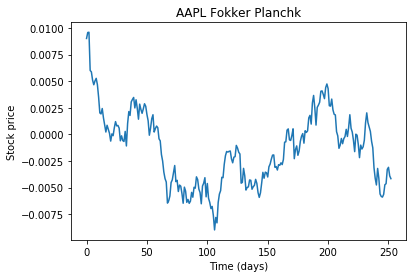

In [14]:
# Plot the simulated stock prices
plt.plot(simulated_prices)
plt.title(symbol + ' Fokker Planchk')
plt.xlabel("Time (days)")
plt.ylabel("Stock price")
plt.show()